# Анализ бизнес-показателей

**Цели исследования:**

1. Выяснить, окупается ли реклама, направленная на привлечение пользователей в целом.
2. Определить, какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы.
3. Понять, чем могут быть вызваны проблемы окупаемости.
2. Выяснить, какие факторы мешают привлечению клиентов.

**Ход исследования:**

1. Импорт необходимых для исследования модулей.
2. Обзор данных, полученных из файлов `/datasets/visits_info_short.csv`, `/datasets/orders_info_short.csv`, `/datasets/costs_info_short.csv`.
3. Предобработка данных, проверка данных на наличие ошибок (пропуски, дубликаты, аномальные значения), их влияния на исследование, поиск путей ипсравления ошибок.
4. Подбор функций для последующего анализа.
5. Исследовательский анализ данных.
6. Изучение параметров маркетинга.
7. Оценка окупаемости рекламы.
8. Подведение итогов.

### Обзор и предобработка данных

#### Выгрузка библиотек и датасетов.

In [1]:
# Выгрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import numpy as np

In [2]:
# Выгрузка датасетов
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),
    pd.read_csv('/datasets/orders_info_short.csv'),
    pd.read_csv('/datasets/costs_info_short.csv')
)
events = None

#### Предобработка данных датасета с визитами.

In [3]:
# изучаю данные датасета с визитами
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
# привожу названия столбцов к 'змеиному' регистру
visits.columns = visits.columns.str.replace(' ', '_').str.lower()

# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

# проверка изменений
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
# поиск явных дубликатов
visits.duplicated().sum()

0

In [6]:
# поиск неявных дубликатов
visits[['user_id', 'session_start']].duplicated().sum()

0

In [7]:
# поиск неявных дубликатов
print(visits['region'].unique()) 
print()
print(visits['device'].unique())
print()
print(visits['channel'].unique())

['United States' 'UK' 'France' 'Germany']

['iPhone' 'Mac' 'Android' 'PC']

['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


In [8]:
# проверяю, за какой промежуток времени представлены данные 
print(visits['session_start'].min(), visits['session_start'].max(), sep='\n')
print()
print(visits['session_end'].min(), visits['session_end'].max(), sep='\n')

2019-05-01 00:00:41
2019-10-31 23:59:23

2019-05-01 00:07:06
2019-11-01 01:38:46


In [9]:
#  проверяю, есть ли неверные данные в столбцах о длительности сессии
visits.query('session_start > session_end')

,user_id,region,device,channel,session_start,session_end


**Проведена предобработка данных датасета с визитами**
1. Названия столбцов приведены к 'змеиному' регистру.
2. Изменен тип данных в столбцах **`session_start` и  `session_end`** c `object` на `datetime`.
3. Данные, хранящиеся в датасете с визитами, не содержат пропуски и дубликаты. 
 

#### Предобработка данных датасета с заказами.

In [10]:
# изучаю данные датасета с заказами
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [11]:
# привожу названия столбцов к 'змеиному' регистру
orders.columns = orders.columns.str.replace(' ', '_').str.lower()

# преобразование данных о времени
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

# проверка изменений
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [12]:
# ищу аномальные значения 
orders['revenue'].unique()

array([ 4.99,  5.99,  9.99, 49.99, 19.99])

In [13]:
# поиск явных дубликатов
orders.duplicated().sum()

0

In [14]:
# проверяю, за какой промежуток времени представлены данные 
print(orders['event_dt'].min(), orders['event_dt'].max(), sep='\n')

2019-05-01 00:28:11
2019-10-31 23:56:56


**Проведена предобработка данных датасета с заказами**
1. Названия столбцов приведены к 'змеиному' регистру.
2. Изменен тип данных в столбцах **`event_dt`** c `object` на `datetime`.
3. Данные, хранящиеся в датасете с заказами, не содержат пропуски и дубликаты. 

#### Предобработка данных датасета с расходами.

In [15]:
# изучаю данные датасета с расходами
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [16]:
# привожу названия столбцов к 'змеиному' регистру
costs.columns = costs.columns.str.lower()

# преобразование данных о времени
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

# проверка изменений
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [17]:
# ищу аномальные значения 
costs['costs'].value_counts()

6.40      26
3.36      21
9.60      20
16.80     19
4.32      17
          ..
217.80     1
186.20     1
176.70     1
273.00     1
55.00      1
Name: costs, Length: 608, dtype: int64

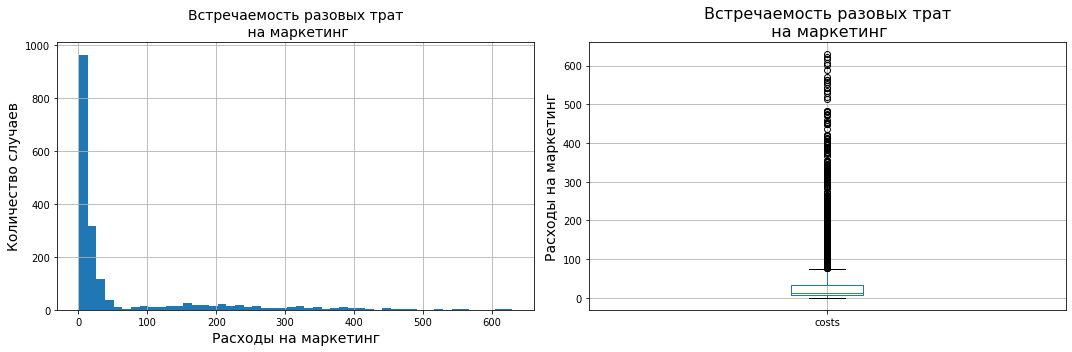

In [18]:
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
costs.hist(bins=50, ax=ax1)
plt.xlabel('Расходы на маркетинг', fontsize=14)
plt.ylabel('Количество случаев', fontsize=14)
plt.title('Встречаемость разовых трат\n на маркетинг', fontsize=14)

ax2 = plt.subplot(1, 2, 2)
costs.boxplot(ax=ax2)
plt.ylabel('Расходы на маркетинг', fontsize=14)
plt.title('Встречаемость разовых трат\n на маркетинг', fontsize=16)
plt.tight_layout()
plt.show()


На графиках видно, что в основном разовые траты на маркетинг небольшие, но так же встречаются случаи аномально высоких разовых трат. Удалять подобные выбросы не целесообразно, так как эти данные влияют на результаты исследования.

In [19]:
costs.duplicated().sum()

0

In [20]:
costs['channel'].value_counts()

TipTop                180
LeapBob               180
FaceBoom              180
OppleCreativeMedia    180
RocketSuperAds        180
MediaTornado          180
YRabbit               180
AdNonSense            180
WahooNetBanner        180
lambdaMediaAds        180
Name: channel, dtype: int64

In [21]:
# проверяю, за какой промежуток времени представлены данные 
print(costs['dt'].min(), costs['dt'].max(), sep='\n')

2019-05-01
2019-10-27


**Проведена предобработка данных датасета с расходами**
1. Названия столбцов приведены к 'змеиному' регистру.
2. Изменен тип данных в столбцах **`dt`** c `object` на `datetime`.
3. Данные, хранящиеся в датасете с заказами, не содержат пропуски и дубликаты. 

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

In [22]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

#     # добавляем флаги для всех событий из event_names
#     for event in event_names:
#         if event in events['event_name'].unique():
#             profiles[event] = profiles['user_id'].isin(
#                 events.query('event_name == @event')['user_id'].unique()
#             )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [23]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [24]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [25]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [26]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [27]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1, legend=False
    )
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend(
          loc='upper left',
          bbox_to_anchor=(1, 0, 0, 1))
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3, legend=False)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
     # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.legend(
          loc='upper left',
          bbox_to_anchor=(1, 0, 0, 1))
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [28]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1, legend=False)
#     plt.legend(
#           loc='upper left',
#           bbox_to_anchor=(1, 0, 0, 1))
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.legend(
          loc='upper left',
          bbox_to_anchor=(1, 0, 0, 1))
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [29]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

#### Создание  профилей пользователей

In [30]:
# создаю таблицу профилей пользователей при помощи функции "get_profiles"
profiles = get_profiles(visits, orders, costs)
profiles.info()
profiles.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  object        
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 10.4+ MB


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [31]:
# минимальная дата привлечения пользователей
min_date = profiles['dt'].min()
print(min_date)

2019-05-01


In [32]:
# максимальная дата привлечения пользователей
max_date = profiles['dt'].max()
print(max_date)

2019-10-27


Я создала таблицу профилей пользователей, в которую входят такие столбцы с данными:
1. `user_id` - уникальный идентификатор пользователя,
2. `first_ts` - дата и время первого посещения ползователем приложения,
3. `channel` - идентификатор источника перехода,
4. `device` - тип устройства пользователя,
5. `region` - страна пользователя,
6. `dt` - дата первого посещения приложения,
7. `month` - первый день месяца, в который это посещение произошло,
8. `payer` - платил ли пользователь, 
9. `acquisition_cost` - стоимость привлечения пользователяю.

Есть данные о пользователях с 1 мая 2019 года по 27 октября 2019.
Для анализа окупаемости рекламы на 14 день я могу ипользовать данные с 1.05.2019 до 18.10.2019 включительно, так как мне нужны пользователи, которые успели "прожить" 2 недели в приложении. Пользователи, привлеченные 19.09.2019 и позже, не подходят для когортного исследования. То есть за момент анализа я беру пользователей, привлеченных до 18.10.2019 включительно.

#### На какую страну приходится больше всего платящих пользователей?

In [33]:
#  считаю количество платящих пользователей для каждого региона
payers = (profiles
    .query('payer == True')                            
    .groupby('region')
    .agg({'user_id':'nunique'})
    .rename(columns={'user_id':'payer_count'})                   
)
payers

,payer_count
region,
France,663
Germany,616
UK,700
United States,6902


In [34]:
#  считаю общее количество пользователей (платящих и не платящих) для каждого региона
region_distribution = (profiles
    .groupby('region')
    .agg({'user_id':'nunique'})
    .rename(columns={'user_id':'user_count'}) 
    .merge(payers, on = 'region')
    .sort_values(by='user_count', ascending=False)                   
    )
region_distribution

,user_count,payer_count
region,,
United States,100002,6902
UK,17575,700
France,17450,663
Germany,14981,616


In [35]:
# считаю для каждого региона долю платящих пользователей от общего числа пользователей
region_distribution['payer_percentage'] = (
    region_distribution['payer_count'] / region_distribution['user_count']
)
region_distribution.style.format({'payer_percentage': '{:.2%}'})


,user_count,payer_count,payer_percentage
region,,,
United States,100002,6902,6.90%
UK,17575,700,3.98%
France,17450,663,3.80%
Germany,14981,616,4.11%


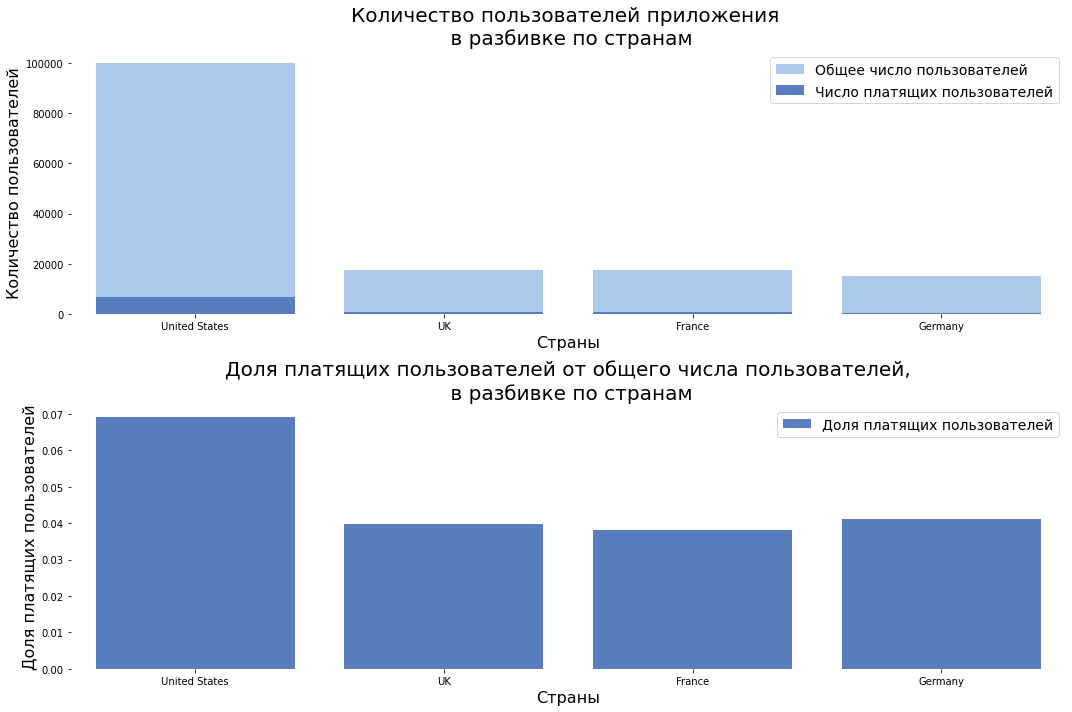

In [36]:
# Строю столбчатую диаграмму, демонстрирующую кол-во пользователей в разбивке по странам
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
sns.set_color_codes('pastel')
sns.barplot(y='user_count', x=region_distribution.index, data=region_distribution,
            label='Общее число пользователей', color='b', ax=ax1)

sns.set_color_codes('muted')
sns.barplot(y='payer_count', x=region_distribution.index, data=region_distribution,
            label='Число платящих пользователей', color="b", ax=ax1)

ax1.legend(loc='upper right', frameon=True, fontsize = 14
         )
ax1.set_ylabel('Количество пользователей', fontsize = 16)
ax1.set_xlabel('Страны', fontsize = 16)
ax1.set_title('Количество пользователей приложения \n в разбивке по странам', fontsize=20)

# Строю столбчатую диаграмму, демонстрирующую долю платящих пользователей в разбивке по странам
sns.set_color_codes('muted')
sns.barplot(y='payer_percentage', 
            x=region_distribution.index, 
            data=region_distribution,
            label='Доля платящих пользователей', color='b', 
            ax=ax2)

ax2.legend(loc='upper right', frameon=True, fontsize = 14
         )
ax2.set_ylabel('Доля платящих пользователей', fontsize = 16)
ax2.set_xlabel('Страны', fontsize = 16)
ax2.set_title('Доля платящих пользователей от общего числа пользователей,\n в разбивке по странам', fontsize=20)
plt.tight_layout()
sns.despine(left=True, bottom=True)

1. Приложение наиболее популярно среди пользователей из США, в европейских странах приложение малопопулярно.
2. Доля платящих пользователей в США выше, чем доля платящих пользователей в европейских странах.

#### Какими устройствами пользуются клиенты?

In [37]:
#  считаю количество платящих пользователей для каждого устройства
payers_d = (profiles
    .query('payer == True')                            
    .groupby('device')
    .agg({'user_id':'nunique'})
    .rename(columns={'user_id':'payer_count'})                   
)
payers_d

,payer_count
device,
Android,2050
Mac,1912
PC,1537
iPhone,3382


In [38]:
#  считаю общее количество  пользователей для каждого устройства и соединяю 2 фрейма
device_distribution = (profiles
    .groupby('device')
    .agg({'user_id':'nunique'})
    .rename(columns={'user_id':'user_count'}) 
    .merge(payers_d, on = 'device')
    .sort_values(by='user_count', ascending=False)                   
    )
device_distribution

,user_count,payer_count
device,,
iPhone,54479,3382
Android,35032,2050
PC,30455,1537
Mac,30042,1912


In [39]:
# считаю для каждого устройства долю платящих  от общего числа пользователей
device_distribution['payer_rate'] = (
    device_distribution['payer_count'] / device_distribution['user_count']
)
device_distribution = device_distribution.sort_values(by='payer_rate', ascending=False) 
device_distribution.style.format({'payer_rate': '{:.2%}'})

,user_count,payer_count,payer_rate
device,,,
Mac,30042,1912,6.36%
iPhone,54479,3382,6.21%
Android,35032,2050,5.85%
PC,30455,1537,5.05%


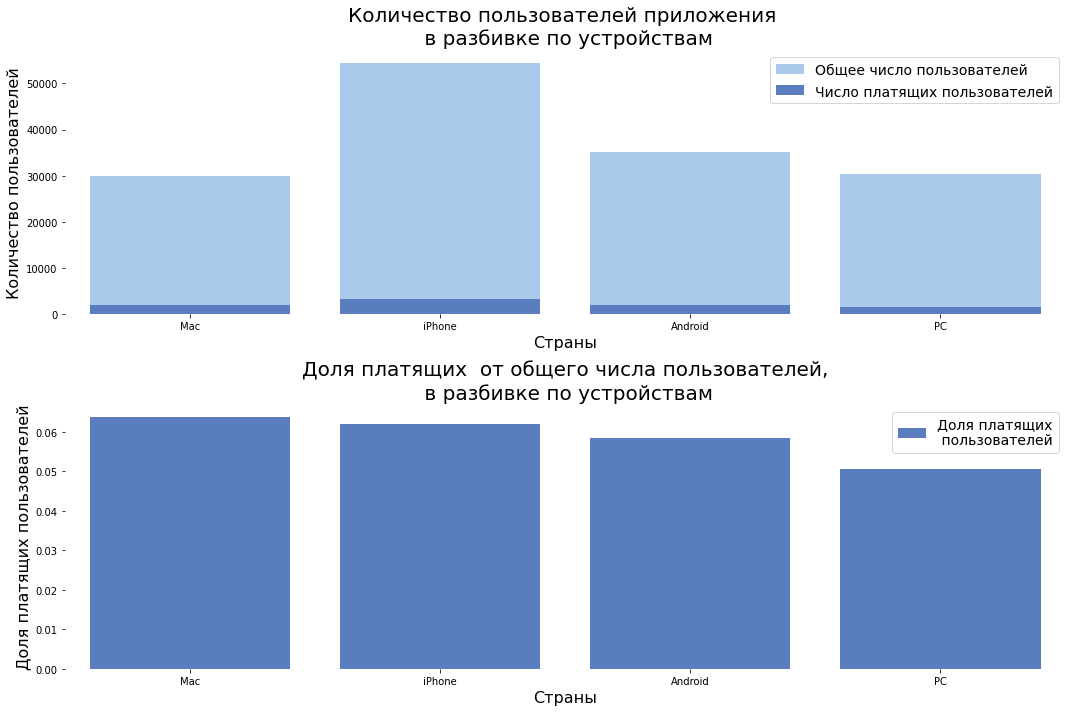

In [40]:
# Строю столбчатую диаграмму, демонстрирующую кол-во пользователей в разбивке по девайсам
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
sns.set_color_codes('pastel')
sns.barplot(y='user_count', x=device_distribution.index, data=device_distribution,
            label='Общее число пользователей', color='b', ax=ax1)

sns.set_color_codes('muted')
sns.barplot(y='payer_count', x=device_distribution.index, data=device_distribution,
            label='Число платящих пользователей', color='b', ax=ax1)

ax1.legend(loc='upper right', frameon=True, fontsize = 14
         )
ax1.set_ylabel('Количество пользователей', fontsize = 16)
ax1.set_xlabel('Страны', fontsize = 16)
ax1.set_title('Количество пользователей приложения \n в разбивке по устройствам', fontsize=20)

# Строю столбчатую диаграмму, демонстрирующую долю платящих пользователей в разбивке по девайсам
sns.set_color_codes('muted')
sns.barplot(y='payer_rate', 
            x=device_distribution.index, 
            data=device_distribution,
            label='Доля платящих\n пользователей', color='b', 
            ax=ax2)

ax2.legend(loc='upper right', frameon=True, fontsize = 14
         )
ax2.set_ylabel('Доля платящих пользователей', fontsize = 16)
ax2.set_xlabel('Страны', fontsize = 16)
ax2.set_title('Доля платящих  от общего числа пользователей,\n в разбивке по устройствам', fontsize=20)
plt.tight_layout()
sns.despine(left=True, bottom=True)

1. Большая часть пользователей заходят в приложение на iPhone.  
2. Доли платящих среди пользователей на всех устройствах примерно равны.
3. Существует просадка по платящим пользователям на РС.

#### По каким каналам приходят пользователи?

In [41]:
payers_c = (profiles
    .query('payer == True')                            
    .groupby('channel')
    .agg({'user_id':'nunique'})
    .rename(columns={'user_id':'payer_count'}) 
    .sort_values(by='payer_count', ascending=False)                    
)
payers_c

,payer_count
channel,
FaceBoom,3557
TipTop,1878
organic,1160
WahooNetBanner,453
AdNonSense,440
RocketSuperAds,352
LeapBob,262
OppleCreativeMedia,233
lambdaMediaAds,225


In [42]:
channel_distribution = (profiles                            
    .groupby('channel')
    .agg({'user_id':'nunique'})
    .rename(columns={'user_id':'user_count'})  
    .merge(payers_c, on='channel')                    
)
channel_distribution['payer_rate'] = channel_distribution['payer_count'] / channel_distribution['user_count']
channel_distribution = channel_distribution.sort_values(by='user_count', ascending=False)  
channel_distribution.style.format({'payer_rate': '{:.2%}'})

,user_count,payer_count,payer_rate
channel,,,
organic,56439,1160,2.06%
FaceBoom,29144,3557,12.20%
TipTop,19561,1878,9.60%
OppleCreativeMedia,8605,233,2.71%
LeapBob,8553,262,3.06%
WahooNetBanner,8553,453,5.30%
RocketSuperAds,4448,352,7.91%
MediaTornado,4364,156,3.57%
YRabbit,4312,165,3.83%


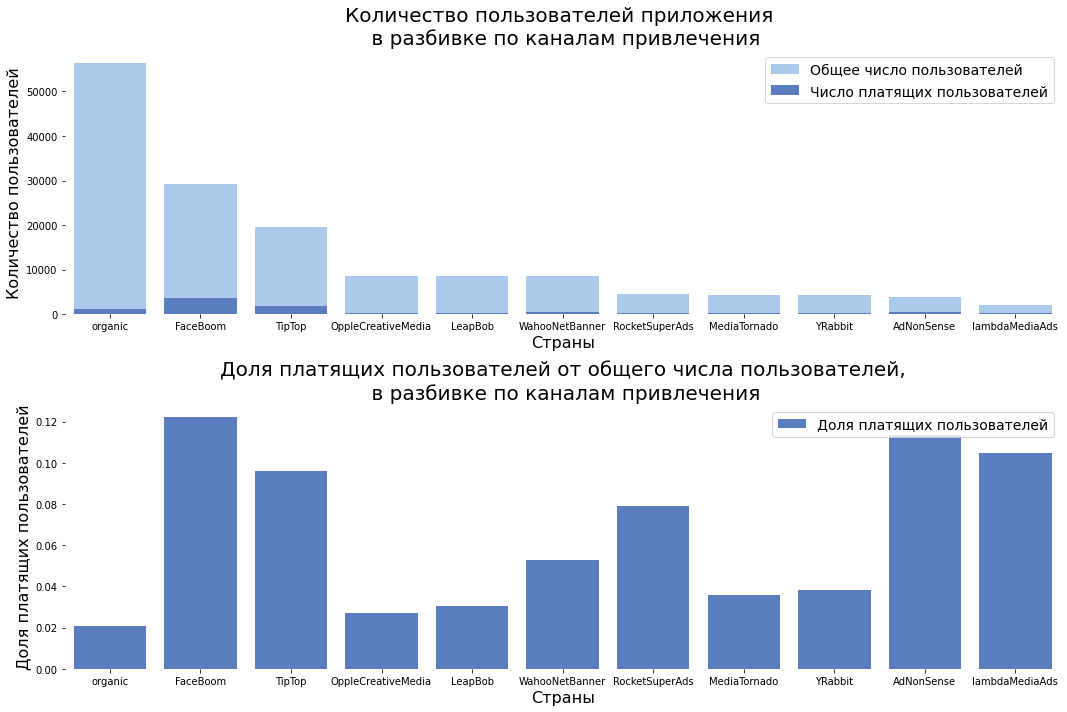

In [43]:
# Строю столбчатую диаграмму, демонстрирующую кол-во пользователей в разбивке по каналам привлечения
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
sns.set_color_codes('pastel')
sns.barplot(y='user_count', x=channel_distribution.index, data=channel_distribution,
            label='Общее число пользователей', color='b', ax=ax1)

sns.set_color_codes('muted')
sns.barplot(y='payer_count', x=channel_distribution.index, data=channel_distribution,
            label='Число платящих пользователей', color='b', ax=ax1)

ax1.legend(loc='upper right', frameon=True, fontsize = 14)
ax1.set_ylabel('Количество пользователей', fontsize = 16)
ax1.set_xlabel('Страны', fontsize = 16)
ax1.set_title('Количество пользователей приложения \n в разбивке по каналам привлечения', fontsize=20)

# Строю столбчатую диаграмму, демонстрирующую долю платящих пользователей в разбивке по каналам привлечения
sns.set_color_codes('muted')
sns.barplot(y='payer_rate', 
            x=channel_distribution.index, 
            data=channel_distribution,
            label='Доля платящих пользователей', color='b', 
            ax=ax2)

ax2.legend(loc='upper right', frameon=True, fontsize = 14
         )
ax2.set_ylabel('Доля платящих пользователей', fontsize = 16)
ax2.set_xlabel('Страны', fontsize = 16)
ax2.set_title('Доля платящих пользователей от общего числа пользователей,\n в разбивке по каналам привлечения', fontsize=20)
plt.tight_layout()
sns.despine(left=True, bottom=True)

1. Пользователи, пришедшие самостоятельно, составляют самую большую группу, но доля платящих среди этой группы пользователей - ожидаемо низкая.
2. Самыми привлекающим каналам являются `FaceBoom`: 
    - данные канал привлек больше всего пользователей
    - доля платящих от всех пользователей, привлеченные данным каналом, наибольшая относительно других каналов привлечения.
3. Несмотря на малое количество пользователей, привлеченных по каналам `AdNonSense` и  `lambdaMediaAds`, доля платящих среди этих групп пользователей достаточно высокая (более 0.1, т.е. более 10% привлеченных пользователей пользуются платными услугами приложения)

**Вывод**

В данном разделе представлен детальный анализ пользовательской активности. Выявлены ключевые показатели:

Основное внимание следует обратить на рынок США, где концентрируется большинство пользователей и отмечается высокая конверсия.

Пользователи мобильных устройств доминируют, что подчеркивает важность оптимизации мобильного опыта. Особенно стоит обратить внимание на пользователей Apple, так как их конверсия значительно выше.

Несмотря на то, что большинство пользователей приходит органическим путем, некоторые платные каналы показывают отличную конверсию, даже если общее количество пользователей с них меньше. Стоит более детально изучить и оптимизировать маркетинговые кампании, основанные на этих данных.



### Маркетинг

#### Общая сумма расходов на маркетинг

In [44]:
total_cost = profiles['acquisition_cost'].sum().round()
print(f'Общая сумма расходов на маркетинг составляет {total_cost}')

Общая сумма расходов на маркетинг составляет 105497.0


#### Затраты на каждый источник

In [45]:
# создаю таблицу
channel_costs =(
    profiles.groupby('channel')
            .agg({'user_id' : 'nunique',  # количество привлеченных пользователей
                 'acquisition_cost' : 'sum'})  # сколько денег потратили на каждый источник
            .rename(columns={'user_id' : 'user_count',
                            'acquisition_cost' : 'costs'})
            .sort_values(by='costs', ascending=False)
)
channel_costs['costs_rate'] = channel_costs['user_count'] / channel_costs['user_count'].sum()
channel_costs.style.format({'costs_rate': '{:.2%}'})

,user_count,costs,costs_rate
channel,,,
TipTop,19561,54751.300000,13.04%
FaceBoom,29144,32445.600000,19.43%
WahooNetBanner,8553,5151.000000,5.70%
AdNonSense,3880,3911.250000,2.59%
OppleCreativeMedia,8605,2151.250000,5.74%
RocketSuperAds,4448,1833.000000,2.97%
LeapBob,8553,1797.600000,5.70%
lambdaMediaAds,2149,1557.600000,1.43%
MediaTornado,4364,954.480000,2.91%


1. В основном пользователи приходят самостоятельно.
2. Большое число пользователей, привлеченных по каналам `Tip Top` и  `FaceBoom`, скорее всего связано с более высокими рекламными расходами.

#### Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику

In [46]:
copy_data = profiles.copy()
copy_data['dt'] = pd.to_datetime(copy_data['dt'])
copy_data.info()
copy_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  datetime64[ns]
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](3), float64(1), int64(1), object(3)
memory usage: 10.4+ MB


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [47]:
df = copy_data.pivot_table( index='dt', columns='channel', values='acquisition_cost', aggfunc='sum')
label=copy_data['channel'].unique()
df.tail()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds,organic
dt,,,,,,,,,,,
2019-10-23,15.75,178.2,10.71,5.28,13.25,5.525,322.0,31.8,6.48,4.0,0.0
2019-10-24,21.00,222.2,12.81,5.04,12.50,5.850,402.5,42.0,7.29,6.4,0.0
2019-10-25,26.25,255.2,14.70,6.24,16.50,7.150,483.0,37.2,7.56,8.8,0.0
2019-10-26,21.00,272.8,14.28,6.72,14.25,4.550,563.5,40.8,5.67,8.8,0.0
2019-10-27,35.70,233.2,12.81,4.56,17.75,10.075,588.0,42.0,11.07,12.0,0.0


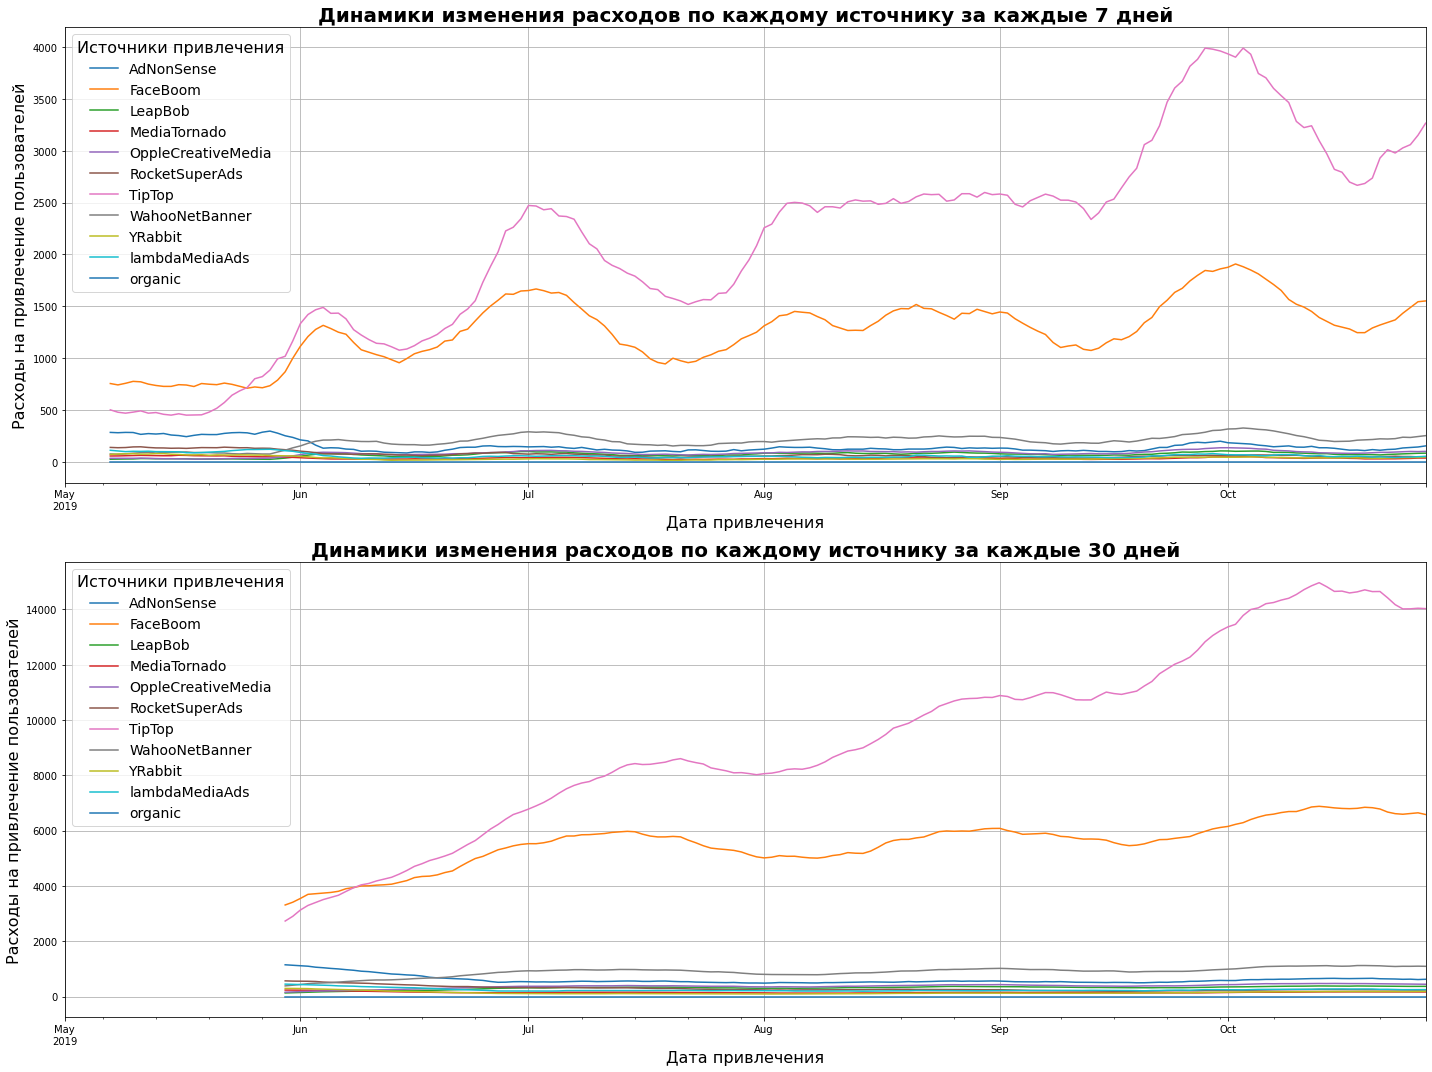

In [48]:
plt.figure(figsize=(20, 15))

for plot_num, window in enumerate([7, 30]):
    # копируем исходный фрейм
    filtered_data = df.copy()
    # для каждого источника считаем скользящее среднее
    for column in df.columns.values:
        filtered_data[column] = filtered_data[column].rolling(window).sum()
    # строим график
    filtered_data.plot(grid=True, ax=plt.subplot(2, 1, plot_num + 1))
    plt.title(f'Динамики изменения расходов по каждому источнику за каждые {window} дней', 
              fontsize = 20,
              loc='center',
              fontweight='bold')
    plt.xlabel('Дата привлечения', fontsize = 16)
    plt.ylabel('Расходы на привлечение пользователей', fontsize = 16)
    plt.legend(title='Источники привлечения',
          title_fontsize = 16, 
          loc='upper left',
          fontsize = 14)
plt.tight_layout()
plt.show() 

1. На графиках видно, что для источников привлечения `Tip Top` и  `FaceBoom` постоянно увеличивали рекламный бюджет.
2. Для остальных источников рекламный бюджет оставался примерно на одном и том же уровне.

#### Рассчет средней суммы привлечения одного пользователя (CAC) из каждого источника

In [49]:
## сичтаю, сколько в среднем стоило привлечение одного пользователя из каждого источника
channel_costs['cac'] = channel_costs['costs'] / channel_costs['user_count']

# сортирую значения сас по убыванию
channel_costs = channel_costs.sort_values(by='cac', ascending=False)
average_cac = (channel_costs['costs'].sum() / channel_costs['user_count'].sum()).round(2)
print(f'Средний САС по проекту равен {average_cac}')
channel_costs['diff'] = channel_costs['cac'] - average_cac
channel_costs.style.format({'costs_rate': '{:.2%}'})

Средний САС по проекту равен 0.7


,user_count,costs,costs_rate,cac,diff
channel,,,,,
TipTop,19561,54751.300000,13.04%,2.799003,2.099003
FaceBoom,29144,32445.600000,19.43%,1.113286,0.413286
AdNonSense,3880,3911.250000,2.59%,1.008054,0.308054
lambdaMediaAds,2149,1557.600000,1.43%,0.724802,0.024802
WahooNetBanner,8553,5151.000000,5.70%,0.602245,-0.097755
RocketSuperAds,4448,1833.000000,2.97%,0.412095,-0.287905
OppleCreativeMedia,8605,2151.250000,5.74%,0.250000,-0.450000
YRabbit,4312,944.220000,2.87%,0.218975,-0.481025
MediaTornado,4364,954.480000,2.91%,0.218717,-0.481283


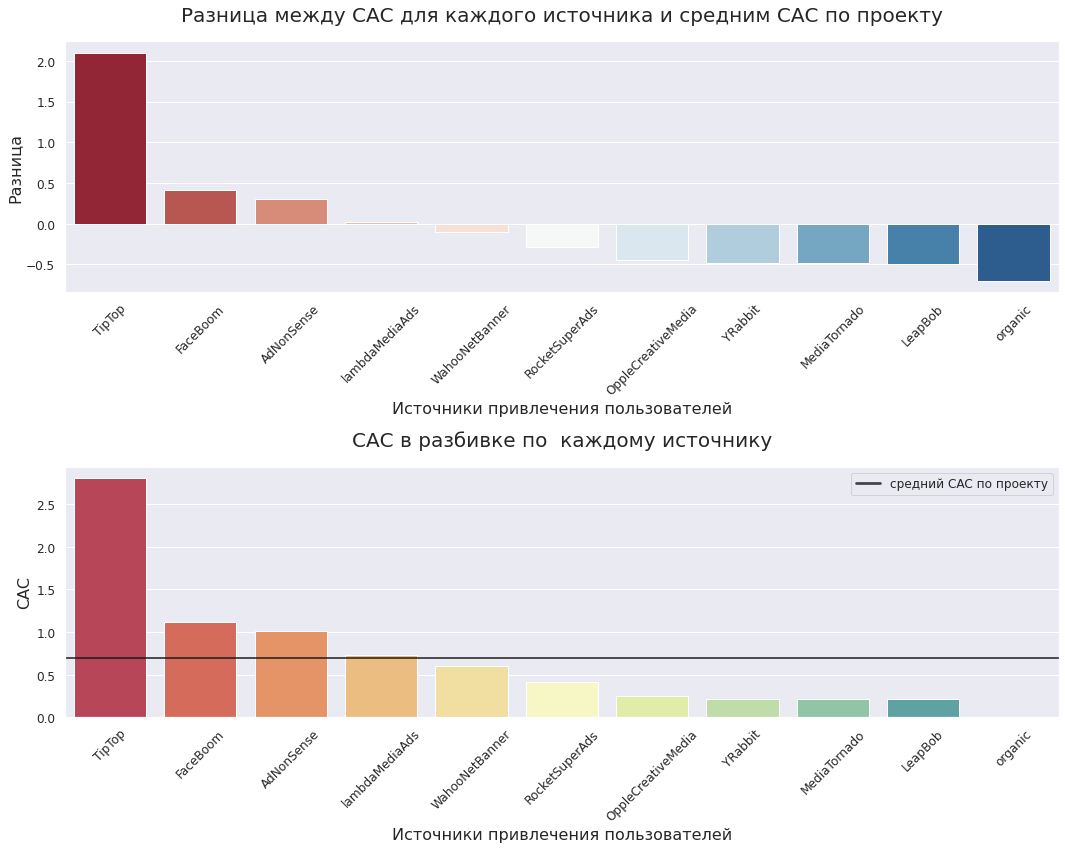

In [50]:
sns.set(font_scale=1.1)
# Смотрю, как распределены жанры по медиане продаж за актуальный период
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
(sns.barplot(data=channel_costs, x=channel_costs.index, y='diff', palette='RdBu', ax=ax1)
    .set_title('Разница между САС для каждого источника и средним САС по проекту', loc='center', fontsize=20, pad=20)
)
ax1.set_xlabel('Источники привлечения пользователей', fontsize=16)
ax1.set_ylabel('Разница', fontsize=16)
ax1.tick_params(axis='x', rotation=45)

(sns.barplot(data=channel_costs, x=channel_costs.index, y='cac', palette='Spectral')
    .set_title('САС в разбивке по  каждому источнику', loc='center', fontsize=20, pad=20)
)
ax2.set_xlabel('Источники привлечения пользователей', fontsize=16)
ax2.set_ylabel('CAC', fontsize=16)
ax2.tick_params(axis='x', rotation=45)
ax2.axhline(average_cac, color='k')
ax2.legend(['средний CAC по проекту'])
plt.tight_layout()
plt.show() 
# plt.suptitle('Популярные платформы для разных регионов', fontsize=26, fontweight='bold');

1. Наиболее дорогостоящим каналом привлечения пользователей является TipTop, однако количество и доля платящих пользователей, приходящих с этого источника, не так высоки. Это можно объяснить молодой аудиторией TipTop'a и, соответственно, не очень высокой их платежеспособностью.

### Оценка окупаемость рекламы

In [51]:
observation_date = datetime(2019, 10, 18).date()  # момент анализа
horizon_days = 14 # горизонт анализа 
horizon_days

14

In [52]:
# Исключаю пользователей с органическим трафиком
profiles = profiles.query('channel != "organic"')

In [53]:
# считаю LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

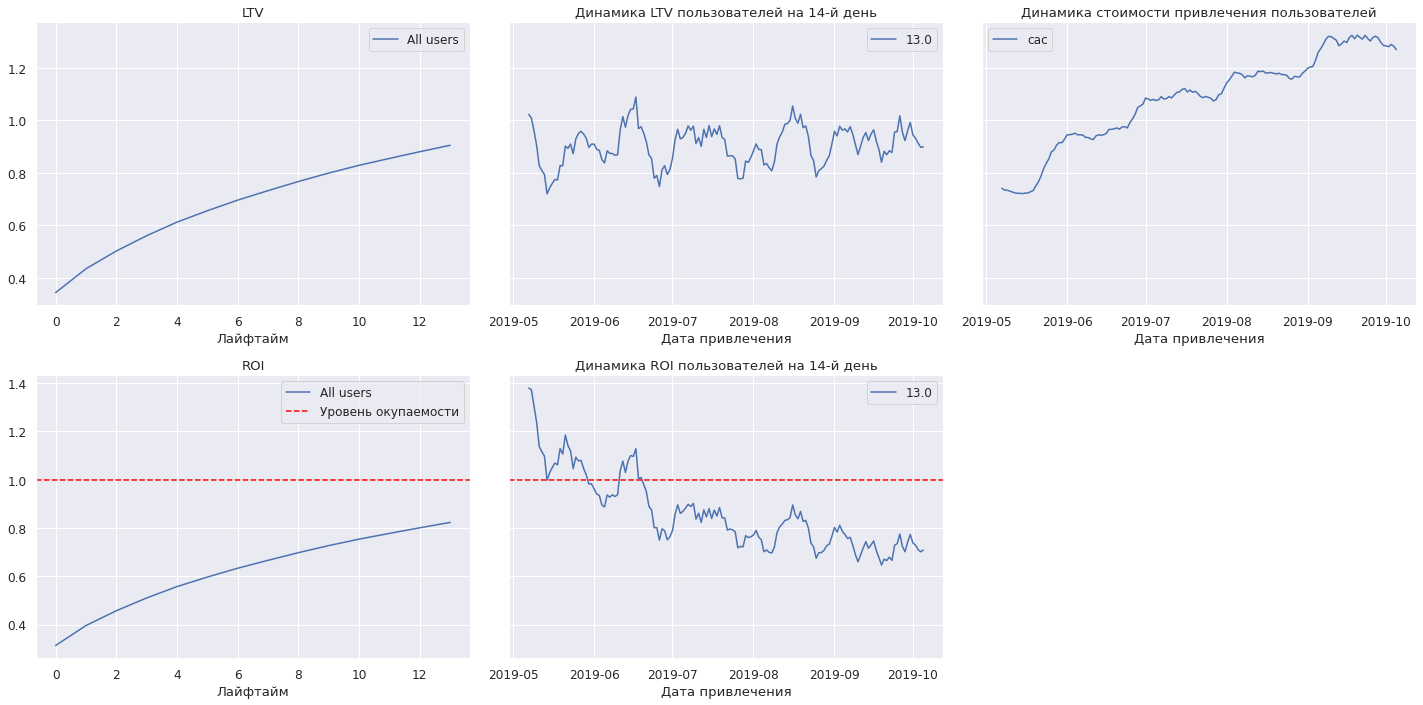

In [54]:
# строю графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод:**

1. Реклама не окупается.
2. CAC за исследуемый период вырос примерно в 3 раза.
3. На LTV влияет помесячный сезонный фактор, но этот показатель достаточно стабилен.
4. На графике динамики ROI видно, что пользователи, привлеченные в мае, стали хуже окупаться, а по мере роста расходов на рекламу начиная с конца июня пользователи перестали окупаться вовсе.

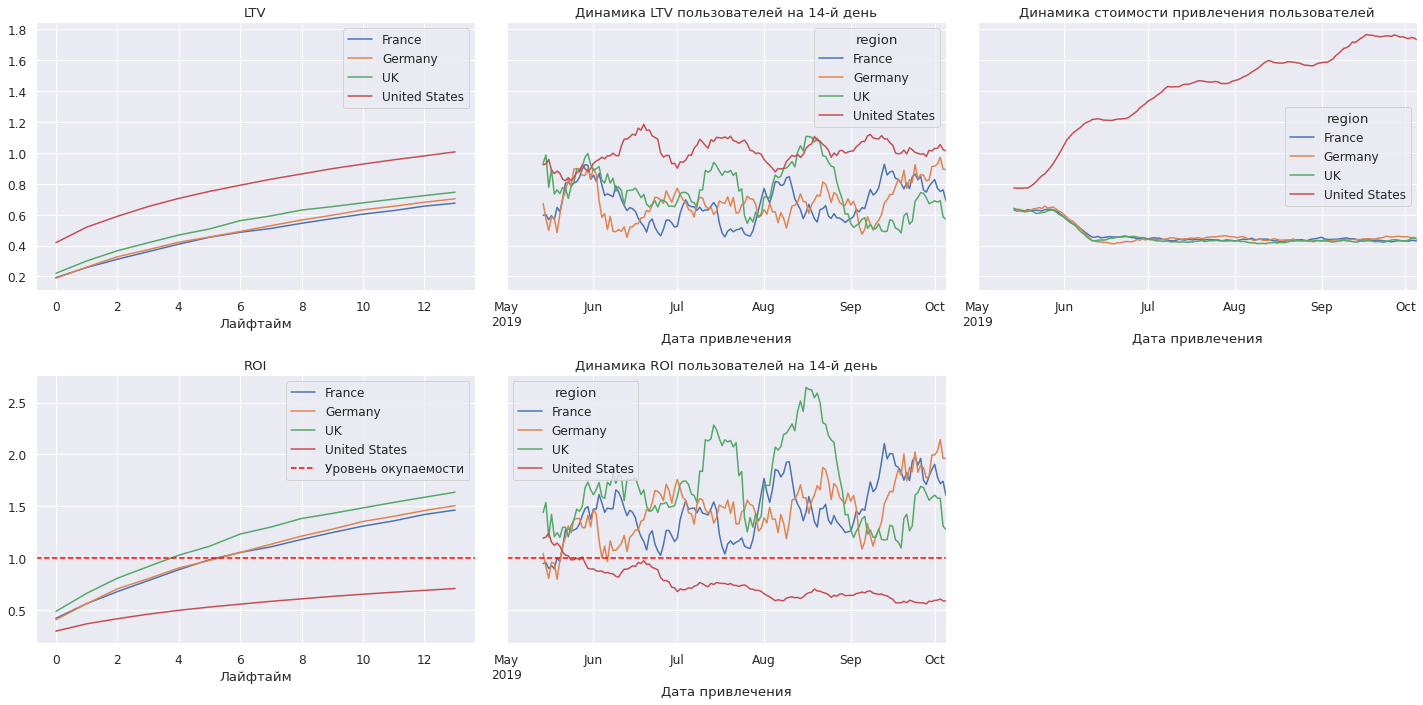

In [55]:
# смотрю окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:**

1. Реклама не окупается в самой популярной у пользователей стране: в США; в странах Европы реклама окупается на 5-7 день.
2. Для стран Европы стоимость привлечения резко упала в начале июня, далее стабильно деражалась на одном уровне. Стоимость привлечения пользователей из США наоборот выросла примерно в 2,5 раза.
3. LTV в целом стабилен. На LTV влияет помесячный сезонный фактор, но этот показатель достаточно стабилен.
4. Хорошо окупается привлечение пользователей из Европы за весь исследуемый период, а вот из США не окупается, начиная уже с конца мая.

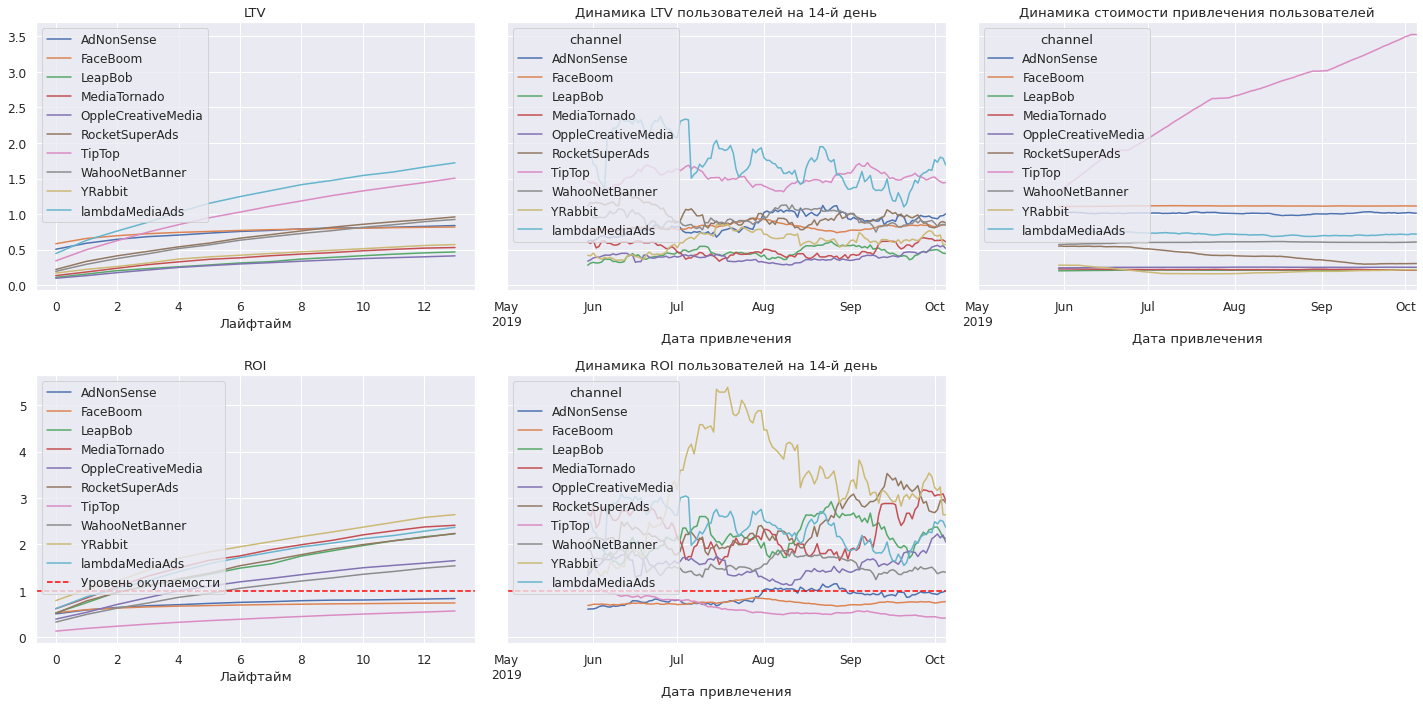

In [56]:
# смотрю окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=30
) 

**Вывод:**

По графикам можно сделать такие выводы:
1. САС для источника Tip Top неуклонно растет, для других каналов характерна относительно стабильная стоимость привлечения. Для канала RocketSuperAds даже наблюдается снижение стоимости привлечения.
2. LTV для lambdaMediaAds падает, для остальных каналов LTV достаточно стабилен.
3. Пользователи, привлеченные по самым затратным каналам (Tip Top, FaceBoom, AdNonSense) не окупаются вовсе, пользователи, привлеченные из других источников, окупаются в течение недели.

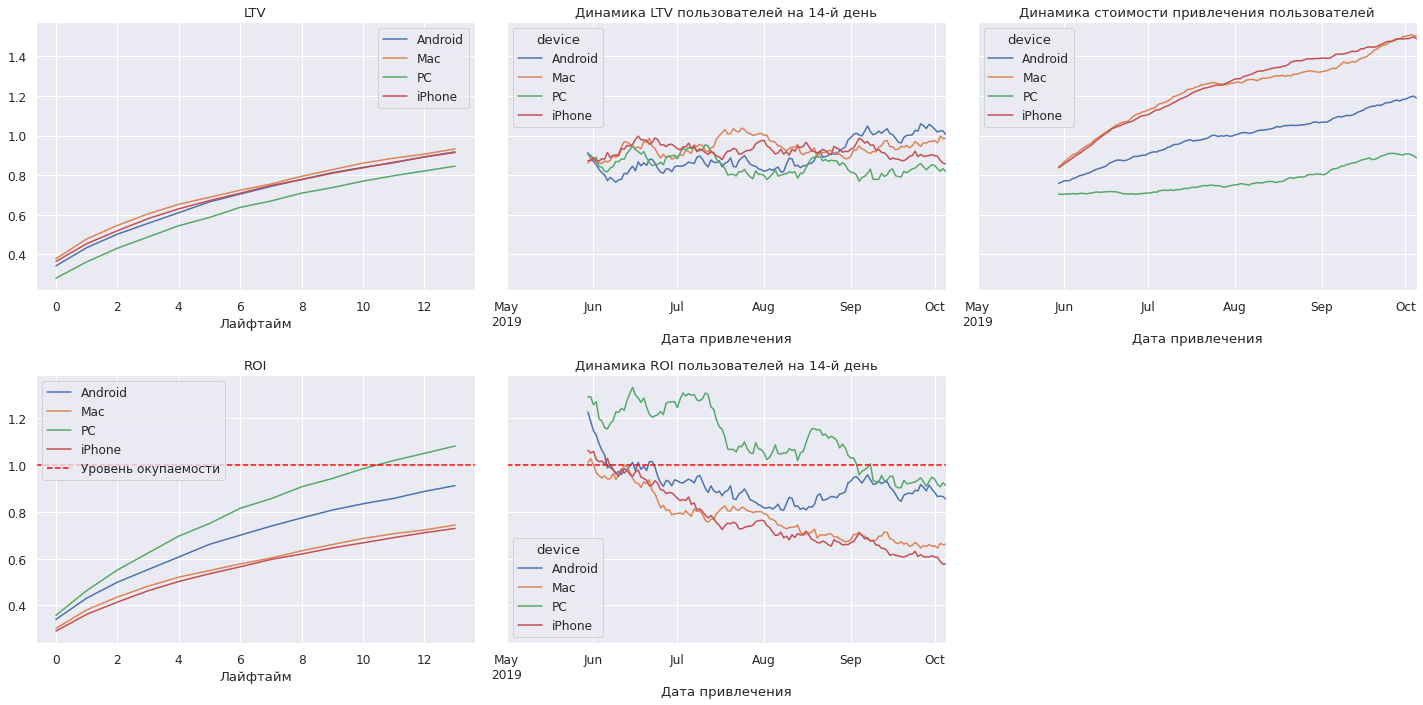

In [57]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=30
) 

**Вывод:**

По графикам можно сделать такие выводы:
1. На LTV влияет помесячный сезонный фактор, но этот показатель для каждого типа устройств достаточно стабилен.
2. Для всех типов устройств САС рос в течение всего исследуемого периода.
3. Пользователи, использующие приложение на РС окупаются на 11-ый день, остальные пользователи не окупаются вовсе, но на графике не наблюдается выход кривых на плато, так что, возможно,  пользователи окупятся в течение 3ей недели.
4. Для всех устройств наблюдается тенденция к снижению уровня окупаемости. Уже начиная с июня перестали окупаться пользователи на Mac, IPhome и Android, а пользователи РС перестали приносить прибыль только с сентября.

#### Конверсия пользователей и динамика её изменения

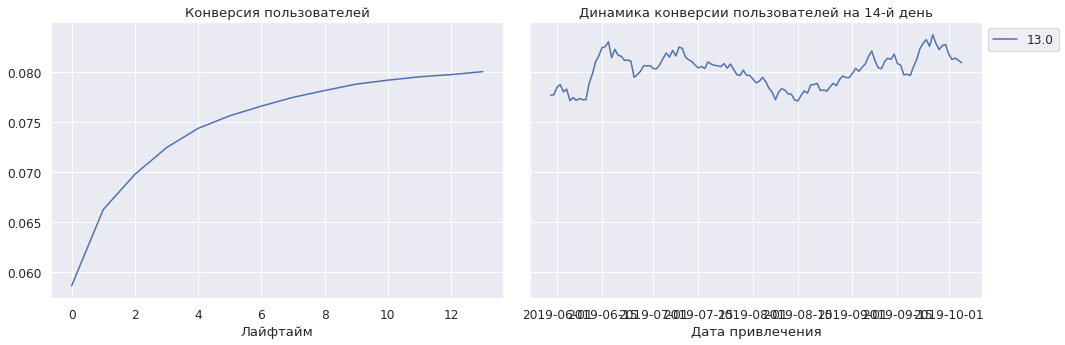

In [58]:
# смотрю конверсию и динамику её изменения по всем пользователям
dimensions = []
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=30) 

**Вывод**

1. В июне наблюдается резкий рост конверсии в сравнении с маем, далее конверсия колеблется на новом уровне. 
2. На графике динамики конверсии летом наблюдается месячная сезонность с максимальной конверсией пользователей, привлеченных в середине месяца, и резким её падением в конце месяца. 
2. В сентябре подобная сезонность не наблюдается, в этом месяце пользователи конвертировались более стаблильно, чем летом. 
3. Каждое понижение конвертации связано с повышением расходов на рекламу (это видно, если смотреть на графики выше), в дни, когда расходы держатся на одном уровне, конвертация пользователей стабильна.

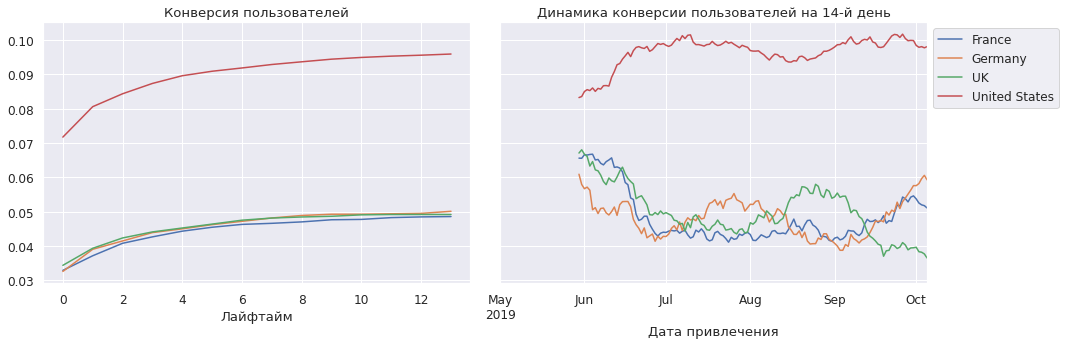

In [59]:
# смотрю конверсию и динамику её изменения в разбивке по регионам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=30) 

**Вывод**

1. Стабильно хорошо конвертируются пользователи из США.
2. В динамике конверсия пользователей из Великобритании и Франции упала.
3. Конверсия пользователей из Германии проседала за в июле и сентябре, но под конец исследуемого периода вернулась к исходному уровню.

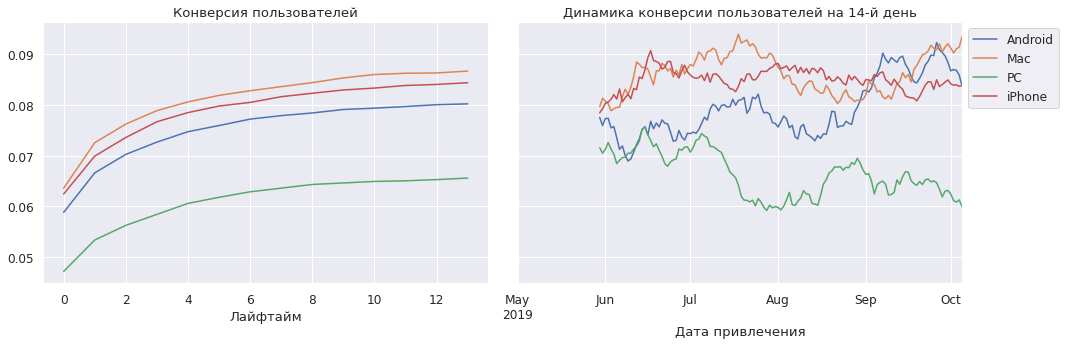

In [60]:
# смотрю конверсию и динамику её изменения в разбивке по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=30) 

**Вывод**

1. Хуже всех конвертируются пользователи РС.
2. Стабильно хорошие показатели конверсии выдают пользователи Мас и IPhone. 
3. В динамике пользователи Android стали конвертироваться лучше.

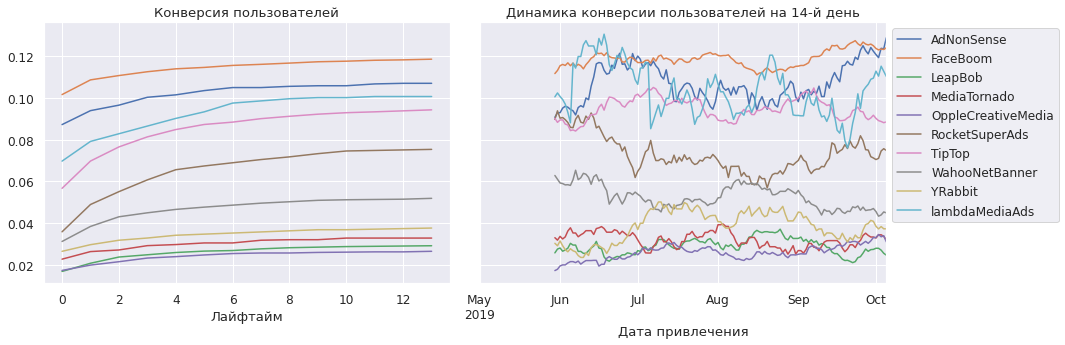

In [61]:
# смотрю конверсию и динамику её изменения в разбивке по каналам привлечения
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=30) 

**Вывод**

1. Пользователи, привлеченные по каналу FaceBoom конвертируются стабильно лучше остальных.
2. Пользователи из источников AbNonSense и lambdaMediaAds в динамике стали конвертироваться лучше.
3. Пользователи из остальных источников конвертируются стабильно плохо.

#### Удержание пользователей и динамика его изменения

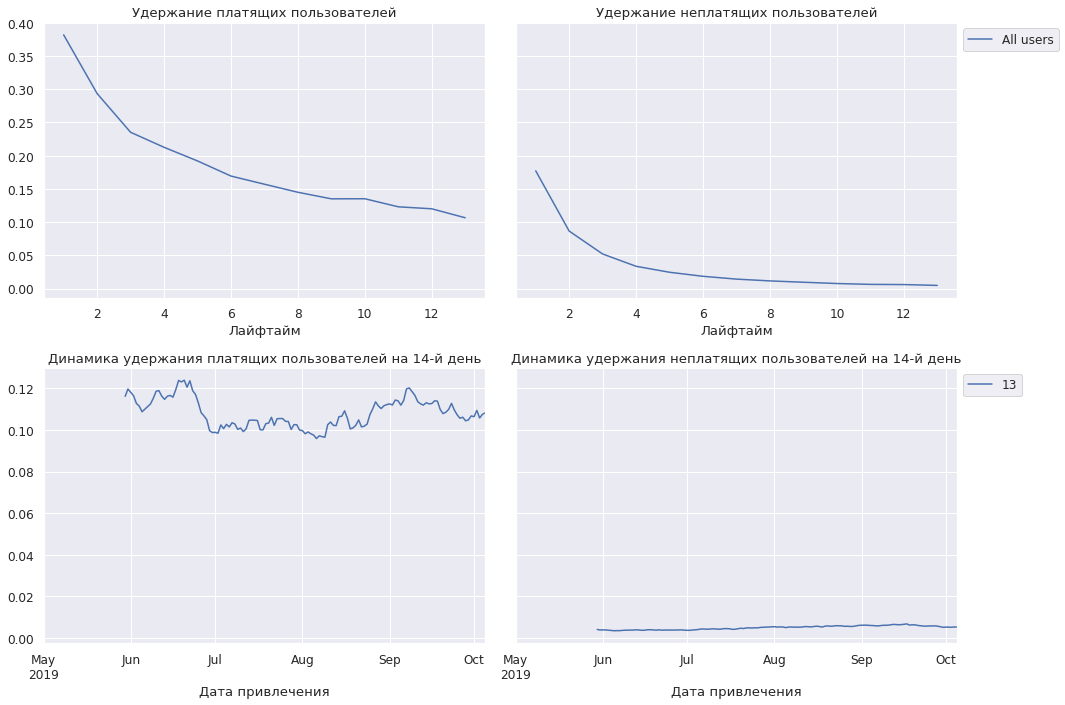

In [62]:
# смотрю удержание пользователей и динамику его изменения по всем пользователям
dimensions = []
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days, window=30) 

**Вывод**

1. Удержание пользователей колеблется на уровне 10%.
2. Удержание платящих ожидаемо выше, чем удержание неплатящих.

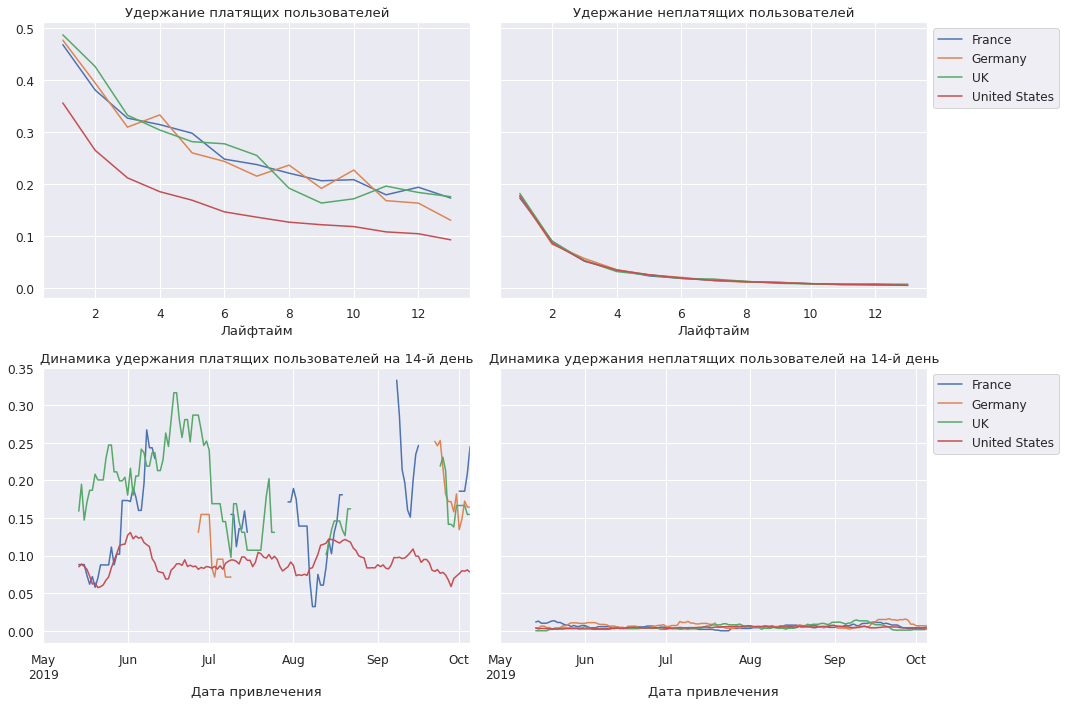

In [63]:
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14)

**Вывод**

1. Пользователи из США удерживаются значительно хуже пользователей из стран Европы.
2. Удержание платящих ожидаемо выше, чем удержание неплатящих.
3. График динамики удержания платящих пользователей в разбивке по странам визуализируется некорректно. 
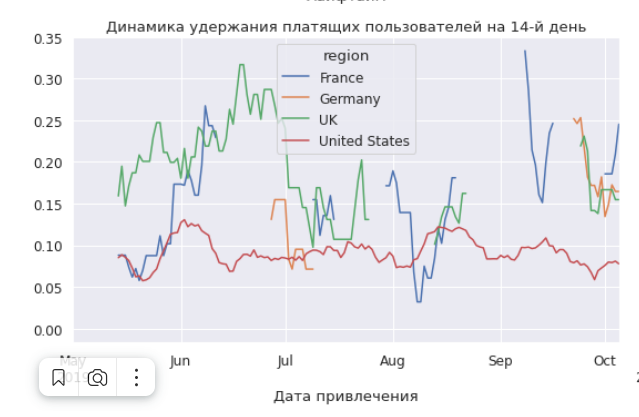

Так что далее я выведу графики динамики удержания для платящих пользователей отдельно по каждому региону.

In [64]:
def test_plot(rh, horizon, window, subplot_num):
    ax = plt.subplot(2, 2, subplot_num)
    columns = [
        name
        for name in rh.index.names
        if name not in ['dt', 'payer']
    ]
    filtered_data = rh.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax)
    plt.ylim(0, 0.35)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

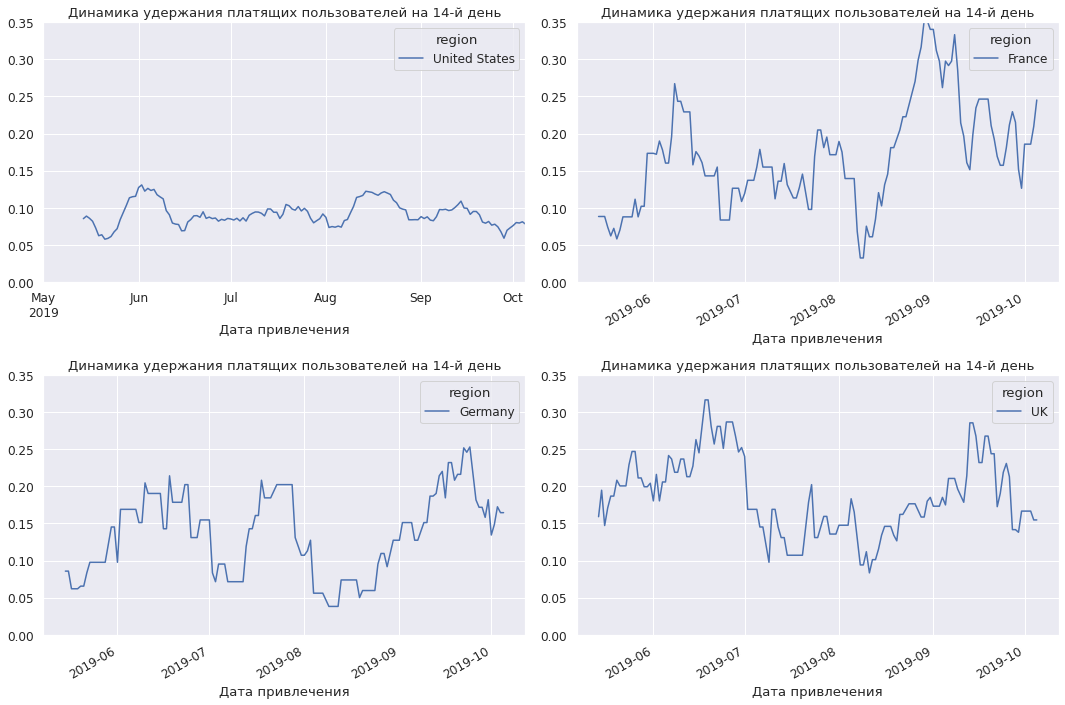

In [65]:
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plt.figure(figsize=(15, 10))
test_plot(retention_history.query('region in ("United States")'), horizon_days, 14, 1)
test_plot(retention_history.query('region in ("France")'), horizon_days, 14, 2)
test_plot(retention_history.query('region in ("Germany")'), horizon_days, 14, 3)
test_plot(retention_history.query('region in ("UK")'), horizon_days, 14, 4)
plt.tight_layout() 

In [66]:
# считаю общее количество строк в таблице retention_history
len(retention_history.axes[0])

1232

In [67]:
# считаю количество строк в таблице retention_history, в которых значения cohort_size не превышают 5
len(retention_history.query('cohort_size <= 5').axes[0])

399

**Вывод**

1. Пользователи из США удерживаются стабильно плохо.
2. Скорее всего, неадекватная визуализация связана с тем, что ежедневно собиралась маленькая когорта пользователей. С этим связана и резкая нестабильность удержания пользователей из стран Европы даже с учетом сглаживания.



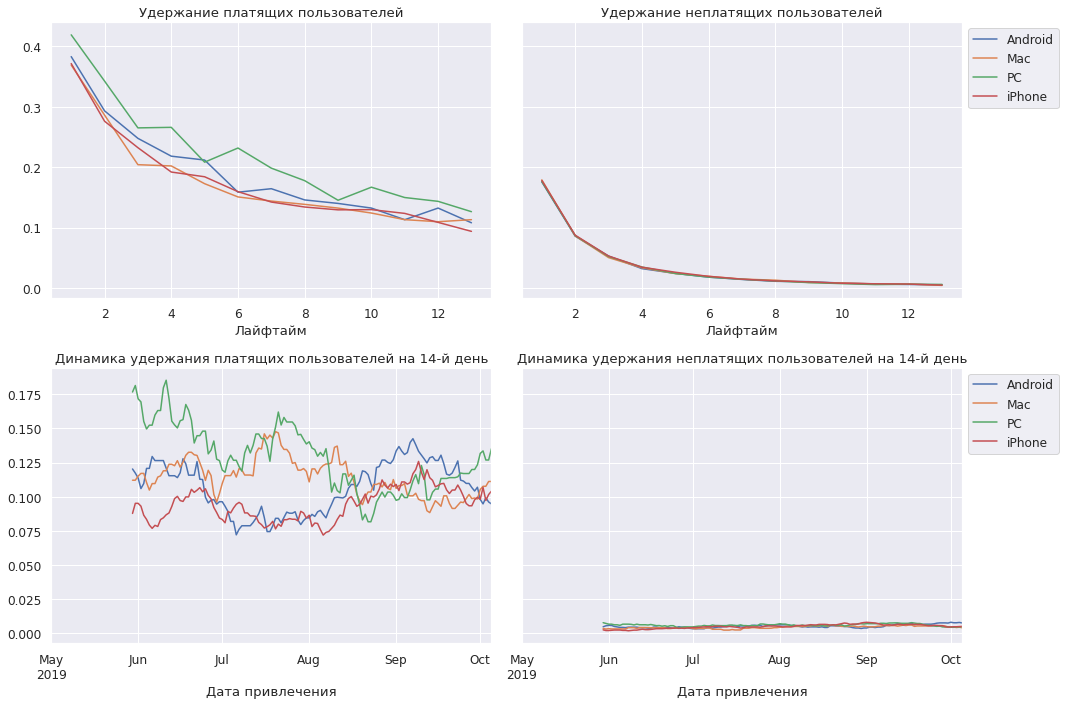

In [68]:
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days, window=30) 

**Вывод**

1. Пользователи РС удерживаются незначительно лучше остальных пользователей, но в динамике наблюдается тенденция к снижению уровня удержания.
2. Удержание платящих ожидаемо выше, чем удержание неплатящих.

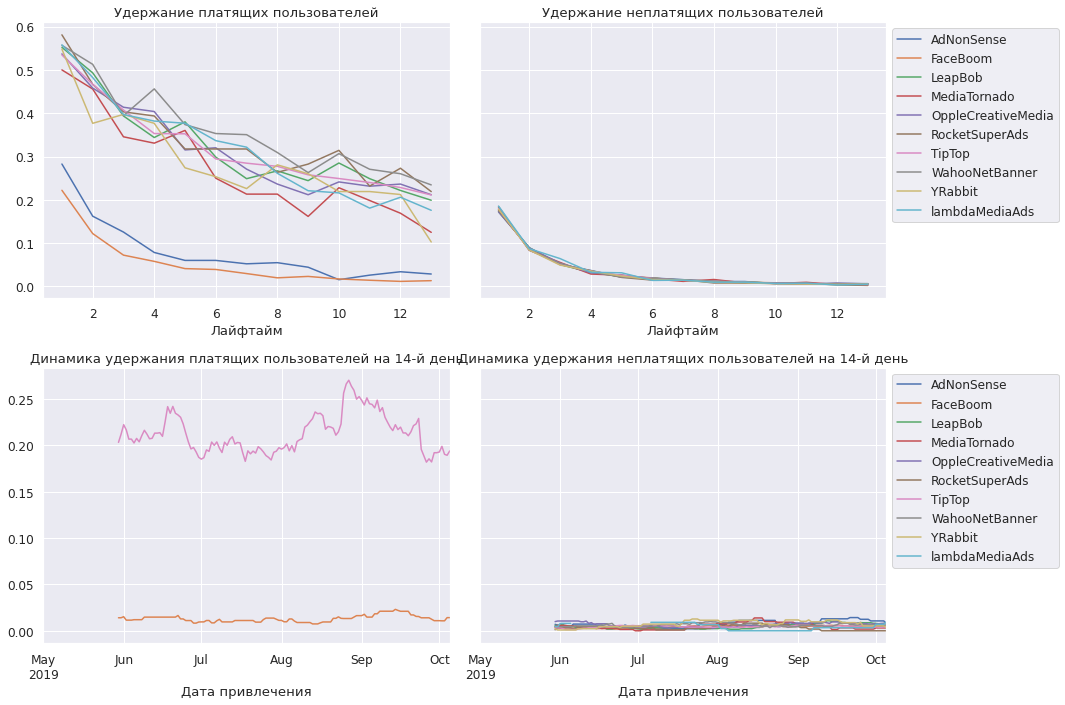

In [69]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days, window=30) 

In [70]:
# считаю общее количество строк в таблице retention_history
len(retention_history.axes[0])

2830

In [71]:
# считаю количество строк в таблице retention_history, в которых значения cohort_size не превышают 5
len(retention_history.query('cohort_size <= 5').axes[0])

943

**Вывод**

Так как бОльшая часть каналов привлекла мало пользователей, когорты получились очень маленькми, что привело к неадекватной визуализации. Делать какие-либо выводы по данным каналом невозможно. Наглядно динамику удержания можно посмотреть только по 2 каналам: FaceBoom и TipTop.
1. Пользователи, привлеченные по каналу FaceBoom, стабильно плохо удерживаются.
2. Пользователи, привлеченные по каналу TipTop, удерживаются хорошо на уровне 20 %.

### Выводы

По мере исследования данных, я выяснила следующее:
1. В целом реклама не окупилась. По мере увеличениия расходов на привлечение пользователей, окупаемость стремительно падала, вледствие чего с середины июля реклама перестала окупаться вовсе, а в сентябре-октябре окупаемость держалась на уровне 70-80%.
2. Несмотря на большое вливание средств в рекламу, конверсия и удержание по всем пользователям за весь исследуемый период осталась примерно на том же уровне.
3. Большая часть пользователей, привлеченных за исследуемый период, из США, значительно меньшую часть от общего числа пользователей занимают пользователи из стран Европы. 
    - стоимость привлечения пользователей из США постоянно росла, стоимость привлечения пользователей из Европы наоборот относительно резко снизилась и большую часть времени стабильно держалась на одном уровне.
    - Расходы на привлечение пользователей из США не окупились, за последние 3 месяца исследования окупаемость держалась на уровне примерно 60-70%. В то время, как привлеченные пользователи из Европы окупались в среднем за неделю, в динамике окупаемость хоть и сильно колебалась, всегда была выше 100%.
    - Конверсия пользователей из США все время оставалась стабильно высокой с тенденцией к незначительному увеличению ее значений. Среди пользователей из Европы, наоборот, сохранялась низкая конверсия.
    - Удерживались пользователи из США стабильно плохо. Сделать выводы по удержанию пользователей из стран Европы затруднительно, так как ежедневно собиралась маленькая когорта пользователей.
    
**Подытожим, пользователи из США составляют бОльшую часть от всех пользователей, привлеченных за исследуемый период. Большое количество расходов на рекламу привели только к увеличению стоимости окупаемости, но практически никак не повлияло на другие метрики: пользователи из США стабильно хорошо конвертируются и стабильно плохо удерживаются. Расходы на рекламу не окупились.**
    
4. Большое число пользователей пользуются мобильной версией приложения, среди мобильных устройств преобладают Айфоны. Значительно меньшее число пользователей открывают приложение на компьютерах. 
    - Стоимость привлечения постоянно росла для всех пользователей, независимо от используемого устройства, но уровень роста окупаемости для каждого устройства разный. Самый дорогие для привлечения - это пользователи Айфонов, более выгодные - пользователи РС.
    - В целом окупаемость упала ниже 100% для всех устройств, но пользователи РС долгое время окупались.
    - Айфон-пользователи стабильно хорошо конвертировались и стабильно плохо удерживались.
    
**Подытожим, пользователи, использующие Айфоны, составляют бОльшую часть от всех пользователей, привлеченных за исследуемый период. Большое количество расходов на рекламу привело только к увеличению стоимости окупаемости, но практически никак не повлияло на другие метрики: пользователи стабильно хорошо конвертируются и стабильно плохо удерживаются. Расходы на рекламу не окупились.** 

5. Основными каналами по числу привлеченных пользователей можно считать 2 источника: FaceBoom и TipTop.
    - В TipTop вкладывали больше всего средств, вследствие чего стоимость окупаемости постоянно росла, а окупаемость держалась на уровне 80% с тенденцией к снижению. 
    - Несмотря на высокие расходы на рекламу, пользователи, привлеченные по каналу TipTop конвертировались не очень успешно, но удержание оставалось относительно стабильно на уровне 20 %.
    - Стоимость окупаемости пользователей, привлеченных по каналу FaceBoom оставалась стабильно на высоком уровне, а привлеченные пользователи стабильно не окупались, уровень окупаемости держался примерно на уровне 90%.
    - Конверсия пользователей из FaceBoom стабильно высокая, но удержание стабильно низкое.
    - Несмотря на небольшое число привлеченных по каналам AdNonSense и lamdaMediaAds, данные пользователи хорошо конвертируются в платящих. Но главная проблема источника AdNonSense состоит в том, что удержание пользователей остается на очень никзом уровне, а lamdaMediaAds удерживает пользователей на достаточно среднем уровне. Вследствие малого количества привлеченных пользователей исследовать динамику удержания по данным каналам невозможно. Данные источники можно считать перспективными.
 
**Подытожим, самыми популярными каналами для привлечения пользователей являются FaceBoom и TipTop. Высокий уровень расходов на рекламу источника TipTop привел только к увеличению стоимости окупаемости, но практически никак не повлиял на другие метрики: пользователи стабильно плохо конвертируются и стабильно хорошо удерживаются.** 

**Рекомендации для маркетологов:**
1. Пользователи из США хорошо конвертируются в платящих, но плохо удерживаются. Возможно, следует провести кампанию, направленную на удержание пользователей.
2. lamdaMediaAds является перспективным каналом для привлечения новых пользователей, так как данные пользователи хорошо конвертируются, и относительно хорошо удерживаются. 
2. В основном пользователи используют мобильную версию приложения. Данные пользователи стабильно хорошо конвертируются и стабильно хорошо удерживаются. 